# Modeling Probability and Randomness in Julia

The two most important packages for modeling probability and randomness in Julia are [Random.jl](https://docs.julialang.org/en/v1/stdlib/Random/) and [Distributions.jl](https://juliastats.org/Distributions.jl/stable/). Excellent references for the material presented in this notebook are [The Distributions.jl paper](https://arxiv.org/pdf/1907.08611.pdf) and [Statistics with Julia](https://people.smp.uq.edu.au/YoniNazarathy/julia-stats/StatisticsWithJulia.pdf). 

In [33]:
using Statistics, StatsBase, Random, Distributions, Plots; pyplot();

Recall that a random variable $X$ quantifies outcomes or events from a random experiment, that is, a procedure with well-deinfed outcomes that can not be precisely determined *a priori*. The principal characteristic of a random variable is its probability distribution, although numerical summaries of random variables such as the expected value (mean) and variance play a major role in understanding randomness. The distribution of a random variable is typically described by way of a cumulative distribution function (cdf) or a probability density function (pdf) in the continuous case or probability mass function (pmf) is the discrete case.    

In computational and experimental mathematics one often wants to simulate randomness by drawing samples for a random variable with some particular properties. This is made possible by Random.jl (for normal and uniform distributions) and Distributions.jl (for a wide class of probability distributions.) We will illustrate these now.  

In [3]:
# draw a sample of size 10 from a standard normal distribution
randn(10)

10-element Array{Float64,1}:
  0.03709574834941717
 -1.244420465592877
  1.6741218117107814
  0.10468747932578294
 -0.12033899618233708
 -0.6319593402121764
 -0.03833057899402476
  0.7587926482454252
 -1.8858438690863302
  1.3763464497347133

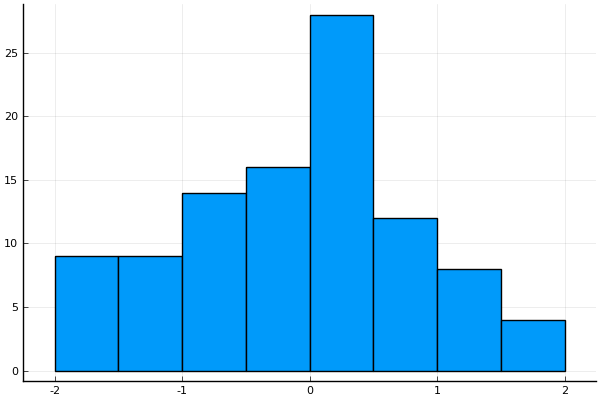

In [7]:
# plot a histogram of samples from a standard normal distribution
histogram(randn(100),legend=false)

The standard normal random variable has mean 0 and standard deviation 1. To simulate random samples from a normal distribution with mean $\mu$ and standard deviation $\sigma$ we may simply do as follows:

In [10]:
μ = 5.
σ = 2.75
X = σ*randn(10) .+ μ # the .+ is necessary for elementwise operations

10-element Array{Float64,1}:
 5.903888685921838
 4.862969297973976
 3.87572720733442
 0.8990220168965113
 4.316861130721829
 2.842253351669798
 1.6955352934021173
 9.15509084478808
 3.9129295644857693
 7.501537341938559

In [11]:
println(mean(X))
println(std(X))

4.49658147351329
2.5194736490769065


In [12]:
# draw a sample of size 10 from a uniform distribution on [0,1]
rand(10)

10-element Array{Float64,1}:
 0.8224361420470194
 0.6486226356609635
 0.7962697617529186
 0.8684109365344443
 0.5994024466021837
 0.18255146225315055
 0.7118133364631605
 0.6161965839418286
 0.635691256781304
 0.8077629404105335

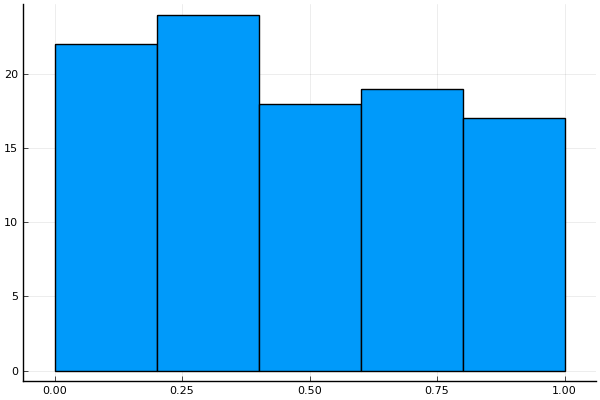

In [13]:
# plot a histogram of samples from a standard normal distribution
histogram(rand(100),legend=false)

To simulate random samples from a uniform distribution over an arbitrary interval $[a,b]$ simply do:

In [14]:
a = 3;
b = 8;
X = (b-a)*rand(10) .+ a

10-element Array{Float64,1}:
 6.790777245772407
 5.671148222407858
 3.4027576811616154
 7.294180324087124
 4.4146676357713375
 4.376093065679042
 4.943126950585668
 7.363652059011777
 4.459167760596052
 3.339420261826823

We can use the sample function to draw a single sample from a specific set.

In [17]:
?sample

search: sample sampler sample! Sampleable wsample wsample! nsamples



```
sample([rng], a, [wv::AbstractWeights])
```

Select a single random element of `a`. Sampling probabilities are proportional to the weights given in `wv`, if provided.

Optionally specify a random number generator `rng` as the first argument (defaults to `Random.GLOBAL_RNG`).

---

```
sample([rng], a, [wv::AbstractWeights], n::Integer; replace=true, ordered=false)
```

Select a random, optionally weighted sample of size `n` from an array `a` using a polyalgorithm. Sampling probabilities are proportional to the weights given in `wv`, if provided. `replace` dictates whether sampling is performed with replacement and `order` dictates whether an ordered sample, also called a sequential sample, should be taken.

Optionally specify a random number generator `rng` as the first argument (defaults to `Random.GLOBAL_RNG`).

---

```
sample([rng], a, [wv::AbstractWeights], dims::Dims; replace=true, ordered=false)
```

Select a random, optionally weighted sample from an array `a` specifying the dimensions `dims` of the output array. Sampling probabilities are proportional to the weights given in `wv`, if provided. `replace` dictates whether sampling is performed with replacement and `order` dictates whether an ordered sample, also called a sequential sample, should be taken.

Optionally specify a random number generator `rng` as the first argument (defaults to `Random.GLOBAL_RNG`).

---

```
sample([rng], wv::AbstractWeights)
```

Select a single random integer in `1:length(wv)` with probabilities proportional to the weights given in `wv`.

Optionally specify a random number generator `rng` as the first argument (defaults to `Random.GLOBAL_RNG`).


In [19]:
A = [1,2,3,4,5,6];
sample(A)

4

Or samples of a fixed size from a specific set.

In [24]:
sample(A,3,replace=false)

3-element Array{Int64,1}:
 1
 5
 2

In [26]:
sample(A,10,replace=true)

10-element Array{Int64,1}:
 3
 5
 1
 6
 5
 3
 2
 3
 6
 3

We can use this, for example, to simulate rolling a six-sided die three times and adding up the result. 

In [27]:
# illustration of a single round
tosses = sample(A,3,replace=true)
sum_vals = sum(tosses)
println(tosses)
println(sum_vals)

[4, 1, 4]
9


In [28]:
# the results of many rounds
plays = [sum(sample(A,3,replace=true)) for _ in 1:100000]

100000-element Array{Int64,1}:
 13
  7
 10
  7
  8
  9
 12
 10
  6
 10
 10
 15
 15
  ⋮
 17
 14
 15
 10
 10
 10
 12
 11
 12
 15
 13
  9

In [35]:
counts(plays)

16-element Array{Int64,1}:
   453
  1417
  2668
  4651
  6930
  9720
 11562
 12594
 12578
 11562
  9646
  7003
  4576
  2804
  1389
   447

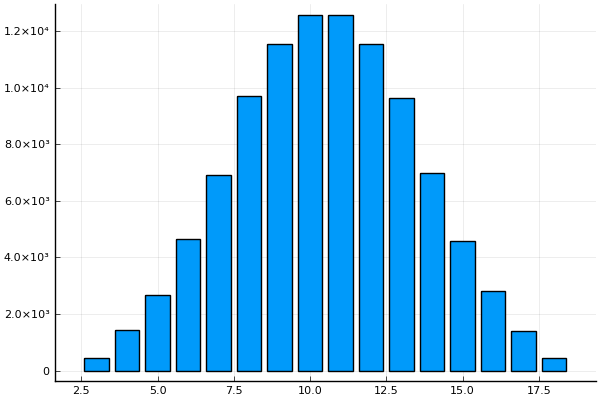

In [37]:
# plot of the results
vals = 3:18;
bar(vals,counts(plays),legend=false)